# Комментарий от ревьюера

Алексей, привет! Меня зовут Влада, я посмотрела твой проект — работа отличная, замечаний нет. Ниже в файле ты найдешь мои комментарии: <font color='green'>зеленый цвет — «все отлично»; </font> <font color='blue'>синий — «хорошо, но можно лучше»; </font> <font color='red'>красный — «нужно исправить».</font> Комментарии в самом коде я отделяю знаками «###».

<center><h1>Курс "Прогнозы и предсказания".
    
    Самостоятельный проект.
</h1></center>

### **Описание проекта**

Задача

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. 

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. 

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас. 

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. 



Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.  

А именно: 

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - 1) выделить целевые группы клиентов;
    - 2) предложить меры по снижению оттока;
    - 3) определить другие особенности взаимодействия с клиентами.
    
Описание данных:

- `'Churn'` — факт оттока в текущем месяце;
- Текущие поля в датасете:
- Данные пользователя за предыдущий до проверки факта оттока месяц:
    - `'gender'` — пол
    - `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр
    - `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
    - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
    - `'Phone'` — наличие контактного телефона
    - `'Age'` — возраст
    - `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах)
    

- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
    - `'Contract_period'` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
    - `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах)
    - `'Group_visits'` — факт посещения групповых занятий
    - `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента
    - `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц
    - `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон


### Шаг 1. Загрузка данных

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, math as mth, seaborn as sns, datetime as dt
from scipy import stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

In [2]:
df=pd.read_csv(r'/datasets/gym_churn.csv')

### Шаг 2. Исследовательский анализ данных (EDA)

* Оценим данные на предмет отсутствующих признаков, изучим средние значения и стандартные отклонения.

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
df.duplicated().sum()

0

Пропуски и дубликаты отсутствуют. Типы данных подходящие.

In [6]:
def binary_percentage(dataframe):
    binary_columns=[]
    for column in dataframe.columns:
        indicator = 'binary'
        for el in dataframe[column].value_counts().index:
            if el != 0 and el != 1: 
                indicator = 'not_binary'
        if indicator == 'binary':
            binary_columns.append(column)
    data_0=[]
    data_1=[]
    for col in binary_columns:
        try:
            data_0.append(dataframe[col].value_counts()[0]*100/len(dataframe))
        except:
            data_0.append(None)    
        try:
            data_1.append(dataframe[col].value_counts()[1]*100/len(dataframe))
        except:
            data_1.append(None)
    return pd.DataFrame(columns = binary_columns, index = ['0, %','1, %'], data=[data_0, data_1])

In [7]:
binary_percentage(df)

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Churn
"0, %",48.975,15.475,51.325,69.15,9.65,58.775,73.475
"1, %",51.025,84.525,48.675,30.85,90.35,41.225,26.525


Таблицу выше можно интерпретировать следующим образом.

В предоставленном наборе данных исходя из бинарных признаков:
- по половому признаку клиенты распределены примерно поровну;
- подавляющая доля (почти 85 %) живёт или работает рядом с фитнес-центром;
- немного больше половины клиентов пришли по партнёрской программе, т.е. приобрели абонемент со скидкой;
- около 70 % клиентов пришли по акции «приведи друга»;
- почти 10 % клиентов не предоставили номер телефона;
- 73 % ушли в отток.

<font color='blue'>Наоборот, 73% остались, а не ушли. </font>

<font color='green'>Хорошо, что рассматриваешь бинарные признаки отдельно, это правильно. </font>


In [8]:
def not_binary(dataframe):
    not_binary_columns=[]
    for column in dataframe.columns:
        indexes_sum = sum(dataframe[column].value_counts().index)
        if indexes_sum !=0 and indexes_sum !=1:
            not_binary_columns.append(column)
    return dataframe[not_binary_columns]

In [9]:
not_binary(df).describe()

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [10]:
df.groupby('Churn').agg('mean')[not_binary(df).columns]

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,
0,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1.728558,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Длительность абонемента - величина дискретная (месяц, 3 месяца, 6 месяцев, год), поэтому на неё посмотрим отдельно, а точнее на то как распределены доли.

<font color='green'>Здорово, что обратил внимание. </font>


In [11]:
df.query('Churn == 1')['Contract_period'].value_counts(normalize=True)*100

1     88.030160
6      9.802074
12     2.167766
Name: Contract_period, dtype: float64

In [12]:
df.query('Churn == 0')['Contract_period'].value_counts(normalize=True)*100

1     43.314052
12    31.881592
6     24.804355
Name: Contract_period, dtype: float64

88 % клиентов из оттока имели абонемент на 1 месяц. То есть просто решили попроовать и бросили и напротив меньше всего (около 2 % клиентов) имели абонемент на год. Соответственно Lifetime у тех кто из оттока должен быть 1 месяц.  

In [13]:
df.query('Churn == 1')['Lifetime'].agg(['mean', 'median'])

mean      0.990575
median    1.000000
Name: Lifetime, dtype: float64

Так и есть. 

Взглянем на распределение бинарных признаков 

In [14]:
binary_percentage(df.query('Churn == 1'))

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Churn
"0, %",48.916117,23.185674,64.467484,81.621112,9.707823,73.138549,NaN
"1, %",51.083883,76.814326,35.532516,18.378888,90.292177,26.861451,100.0


In [15]:
binary_percentage(df.query('Churn == 0'))

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Churn
"0, %",48.996257,12.691392,46.58047,64.647839,9.629126,53.589656,100.0
"1, %",51.003743,87.308608,53.41953,35.352161,90.370874,46.410344,NaN


Теперь посмотрим на распределения не бинарных признаков с помощью графиков.

<font color='blue'>Для бинарных признаков тоже стоило изобразить графики распределений. </font>


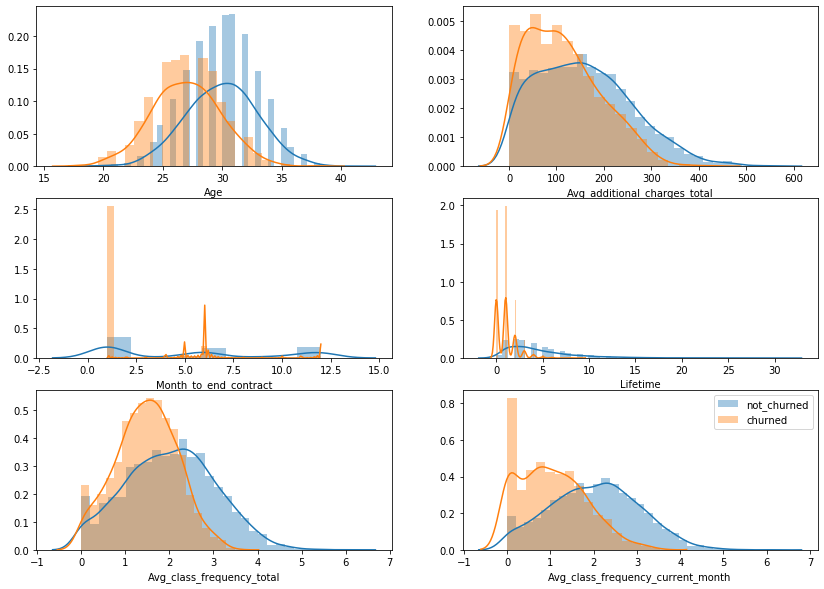

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (14,10))
fig.subplots_adjust(wspace=0.2, hspace = 0.2)
for i, col in enumerate(not_binary(df.loc[:, df.columns != 'Contract_period']).columns):    
    sns.distplot(df.query('Churn == 0')[col], ax=ax[i//2, (i)%2],label='not_churned')    
    sns.distplot(df.query('Churn == 1')[col], ax=ax[i//2, (i)%2],label='churned')
plt.legend()
plt.show()

In [17]:
not_binary(df.query('Churn == 0')).describe()

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
std,4.716942,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994
min,1.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000
25%,1.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021
50%,6.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697
75%,12.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [18]:
df.groupby('Churn').describe()

gender                                              Near_Location  \
        count      mean       std  min  25%  50%  75%  max         count   
Churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                                                   Partner            \
           mean       std  min  25%  50%  75%  max   count      mean   
Churn                                                                  
0      0.873086  0.332933  0.0  1.0  1.0  1.0  1.0  2939.0  0.534195   
1      0.768143  0.422217  0.0  1.0  1.0  1.0  1.0  1061.0  0.355325   

                                         Promo_friends                      \
            std  min  25%  50%  75%  max         count      mean       std   
Churn                                                                        
0      0.498914  0.0  0.0  1.0  1.0  1.0        2939.0  0.353522  0.478144   
1      0.478837  0.0  0.0  0.0  1.0  1.0        1061.0  0.183789  0.387495   

                                 Phone                                     \
       min  25%  50%  75%  max   count      mean       std  min  25%  50%   
Churn                                                                       
0      0.0  0.0  0.0  1.0  1.0  2939.0  0.903709  0.295040  0.0  1.0  1.0   
1      0.0  0.0  0.0  0.0  1.0  1061.0  0.902922  0.296204  0.0  1.0  1.0   

                Contract_period                                           \
       75%  max           count      mean       std  min  25%  50%   75%   
Churn                                                                      
0      1.0  1.0          2939.0  5.747193  4.716942  1.0  1.0  6.0  12.0   
1      1.0  1.0          1061.0  1.728558  2.132371  1.0  1.0  1.0   1.0   

            Group_visits                                                  Age  \
        max        count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                           
0      12.0       2939.0  0.464103  0.498795  0.0  0.0  0.0  1.0  1.0  2939.0   
1      12.0       1061.0  0.268615  0.443448  0.0  0.0  0.0  1.0  1.0  1061.0   

                                                          \
            mean       std   min   25%   50%   75%   max   
Churn                                                      
0      29.976523  3.009933  19.0  28.0  30.0  32.0  41.0   
1      26.989632  2.895163  18.0  25.0  27.0  29.0  38.0   

      Avg_additional_charges_total                                   \
                             count        mean        std       min   
Churn                                                                 
0                           2939.0  158.445715  99.801599  0.171862   
1                           1061.0  115.082899  77.696419  0.148205   

                                                    Month_to_end_contract  \
             25%         50%         75%        max                 count   
Churn                                                                       
0      76.920993  149.881171  224.448274  552.59074                2939.0   
1      50.629127  103.814686  165.616858  425.53522                1061.0   

                                                     Lifetime            \
           mean       std  min  25%  50%   75%   max    count      mean   
Churn                                                                     
0      5.283089  4.363522  1.0  1.0  6.0  10.0  12.0   2939.0  4.711807   
1      1.662582  1.964593  1.0  1.0  1.0   1.0  12.0   1061.0  0.990575   

                                          Avg_class_frequency_total            \
            std  min  25%  50%  75%   max                     count      mean   
Churn                                                                           
0      3.874780  0.0  2.0  4.0  6.0  31

* те, кто ушёл в отток в среднем немного моложе
* ушедшие в отток клиенты тратили меньше на дополнительные услуги
* чаще всего уходят за 1 месяц до оконачания абонемента и за промежуток от 5 до 6 месяцев
* время с момента первого обращения у тех кто ушёл от 1 до 2 месяцев

Существенные различия между группами наблюдаются в распределении частоты посещений. В целом те кто ушел в отток посещают фитнес-центр реже.

<font color='green'>Отлично, все верно. </font>


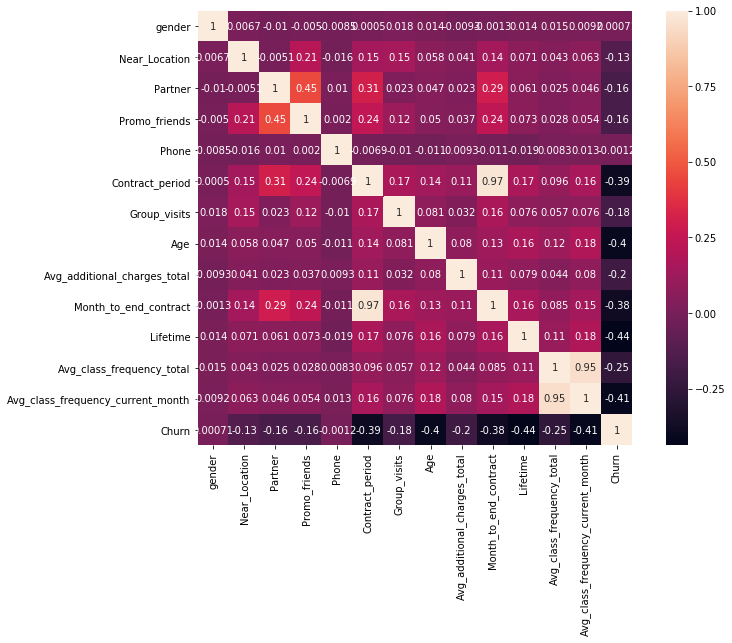

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, square=True)

На матрице корреляций заметно наличие в данных нескольких скоррелированных признаков:  
- Month_to_end_contract и Contract_period
- Avg_class_frequency_total и  Avg_class_frequency_current_month

В дальнейшем, для использования машинного обучения число признаков можно будет сократить.Признаков, имеющих сильную взаимосвязь с целевой переменной не наблюается.

<font color='green'>Ок, все в порядке. </font>


### Шаг 3. Построение модели прогнозирования оттока пользователей

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
probabilities = model.predict_proba(X_test)[:,1]
predictions = model.predict(X_test)

In [24]:
LogisticRegression_metrics=pd.DataFrame({'Metrics':['Accuracy:', 'Precision:','Recall:'],
              'Value':['{:.2f}'.format(
                  accuracy_score(y_test, predictions)),
                       '{:.2f}'.format(precision_score (y_test, predictions)),
                       '{:.2f}'.format(recall_score (y_test, predictions))]})

In [25]:
metrics_report_lr=classification_report(y_test, predictions, output_dict=True)

In [26]:
features = pd.DataFrame({'feature':X.columns, 'coeff': model.coef_[0]})

In [27]:
features['coeff_abs'] = features['coeff'].abs()

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
probabilities = model.predict_proba(X_test)[:,1]
predictions = model.predict(X_test)

In [30]:
RandomForestClassifier_metrics=pd.DataFrame({'Metrics':['Accuracy:', 'Precision:','Recall:'],
              'Value':['{:.2f}'.format(
                  accuracy_score(y_test, predictions)),
                       '{:.2f}'.format(precision_score (y_test, predictions)),
                       '{:.2f}'.format(recall_score (y_test, predictions))]})

In [31]:
metrics_report_rf=classification_report(y_test, predictions, output_dict=True)

In [32]:
LogisticRegression_metrics

,Metrics,Value
0,Accuracy:,0.93
1,Precision:,0.86
2,Recall:,0.83


In [33]:
RandomForestClassifier_metrics

,Metrics,Value
0,Accuracy:,0.92
1,Precision:,0.85
2,Recall:,0.80


In [34]:
pd.DataFrame(metrics_report_lr).transpose()

,precision,recall,f1-score,support
0,0.944262,0.956811,0.950495,602.000
1,0.863158,0.828283,0.845361,198.000
accuracy,0.925000,0.925000,0.925000,0.925
macro avg,0.903710,0.892547,0.897928,800.000
weighted avg,0.924189,0.925000,0.924474,800.000


In [35]:
pd.DataFrame(metrics_report_rf).transpose()

,precision,recall,f1-score,support
0,0.936482,0.95515,0.945724,602.0000
1,0.854839,0.80303,0.828125,198.0000
accuracy,0.917500,0.91750,0.917500,0.9175
macro avg,0.895660,0.87909,0.886924,800.0000
weighted avg,0.916275,0.91750,0.916618,800.0000


Линейная регрессия показала себя лучше, чем случайный лес.

In [36]:
features.sort_values(by='coeff_abs', ascending=False)

,feature,coeff,coeff_abs
12,Avg_class_frequency_current_month,-4.138124,4.138124
11,Avg_class_frequency_total,3.445343,3.445343
10,Lifetime,-0.973167,0.973167
6,Group_visits,-0.714211,0.714211
4,Phone,0.603973,0.603973
3,Promo_friends,-0.569838,0.569838
5,Contract_period,-0.186812,0.186812
7,Age,-0.183364,0.183364
9,Month_to_end_contract,-0.069694,0.069694
1,Near_Location,0.060086,0.060086


Самые влиятельные признаки в целом характеризуют активность.

<font color='green'>Да, логистическая регрессия показала себя немного лучше. </font>

<font color='blue'>Этого не сказано в задании, но более корректно было бы поделить выборку на 3 части: обучающую, валидационную и тестовую. На обучающей выборке настраивать модели (fit), на валидационной – проверять качество всех моделей и выбирать лучшую, на тестовой – оценивать качество итоговой модели. Было бы неплохо перебрать несколько значений гиперпараметров для каждой модели (например, для RandomForestRegressor перебрать разные значения n_estimators).</font>

### Шаг 4. Кластеризация пользователей

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [38]:
sc = StandardScaler()
X_sc = sc.fit_transform(df.loc[:, df.columns != 'Churn'])
linked = linkage(X_sc, method = 'ward') 

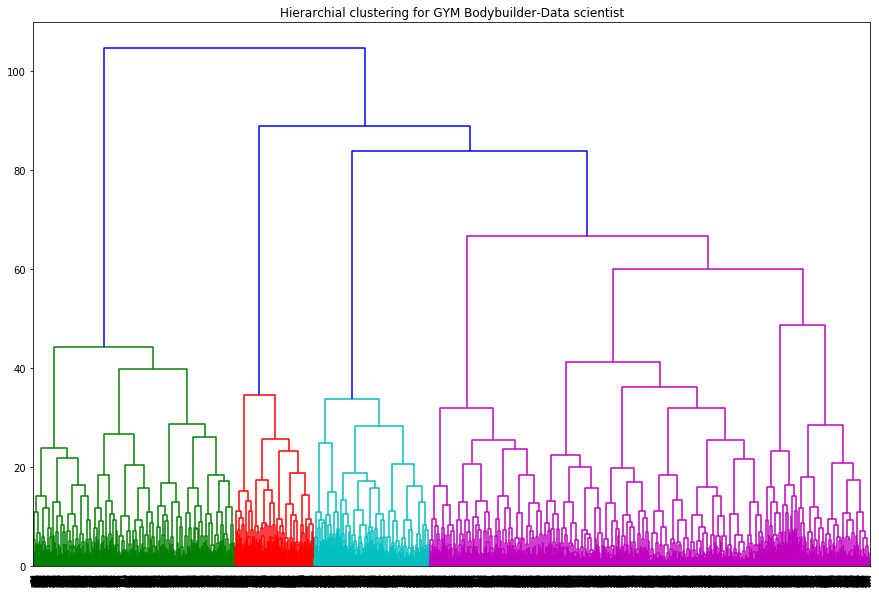

In [39]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', leaf_rotation=90)
plt.title('Hierarchial clustering for GYM Bodybuilder-Data scientist')
plt.show()

<font color='blue'>Где сам график? :)</font>

Предложенное оптимальное число кластеров 4.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Число кластеров укажем равным 5 (по договорённости).

In [40]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)

<font color='blue'>Стоило задать random_state в KMeans для воспроизводимости результатов. </font>

In [41]:
df['cluster_km'] = labels

In [42]:
df.groupby('cluster_km').agg('mean').reset_index().sort_values(by='Churn', ascending=False)

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.487785,1.000000,0.346906,0.232899,1.0,1.966612,0.340391,28.130293,130.780682,1.875407,2.346906,1.230110,0.990748,0.523616
4,4,0.495069,0.000000,0.461538,0.078895,1.0,2.357002,0.216963,28.487179,135.597531,2.203156,2.804734,1.667761,1.486188,0.441815
2,2,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,1,0.555172,0.979310,0.364368,0.244828,1.0,2.591954,0.467816,30.095402,161.654592,2.393103,4.947126,2.803250,2.798283,0.072414
3,3,0.501487,0.959366,0.780971,0.571853,1.0,10.917740,0.544103,29.988107,160.678329,9.975223,4.727453,1.987510,1.980291,0.027750


Выделяются два кластера с наибольшей долей (вероятностью) оттока, для которых характерны следующие признаки:

* в обоих кластерах преобладает один пол над другим;
* оба кластера имеют кардинальное различие по месту нахождения (Near_Location 0 или 1);
* средняя длительность абонемента у кластеров ниже остальных. В целом наблюдается обратная зависимость доли ушедших клиентов от средней длительности абонемента;
* частота посещения ниже, чем у клиентов из остальных кластеров.


Кластеры 0 и 2 склонны к оттоку, а 1 и 3 надежные.

<font color='blue'>В текущих экспериментах кластеры 3 и 4 склонны к оттоку, кластеры 1 и 2 надежны. </font>

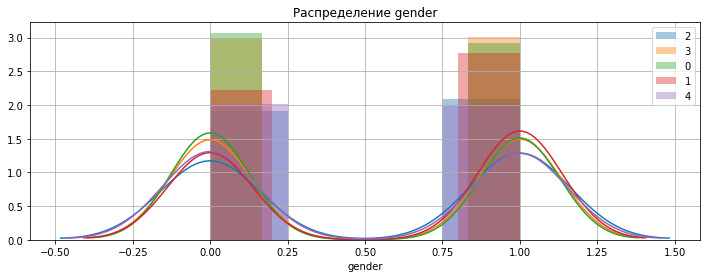

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


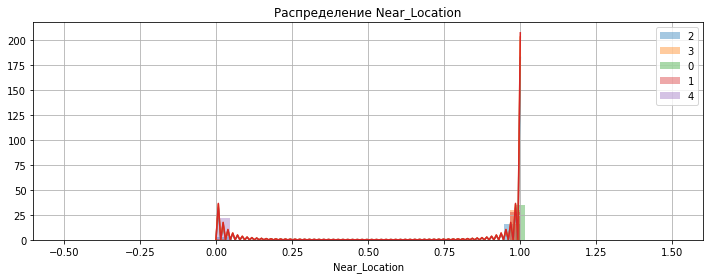

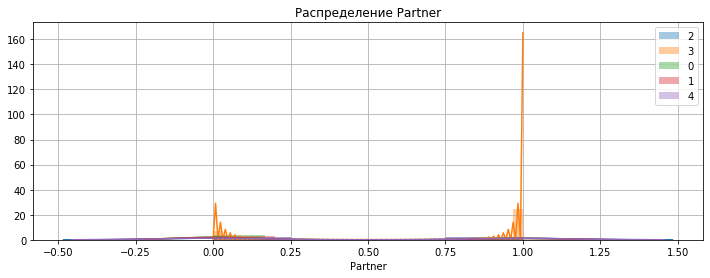

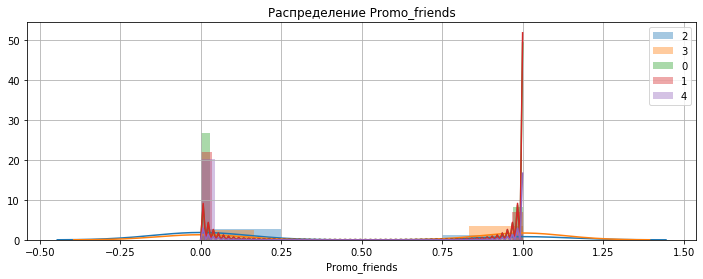

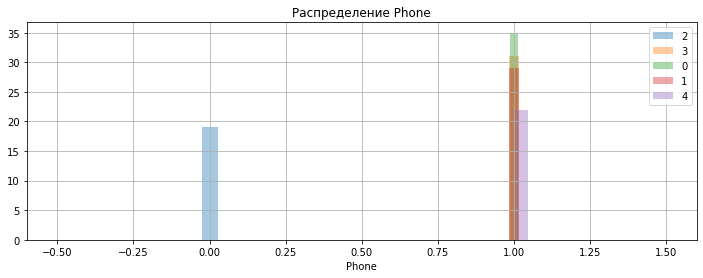

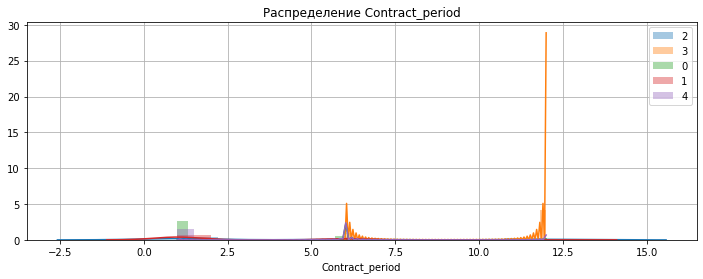

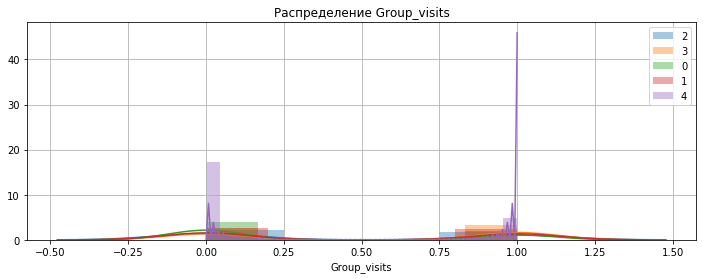

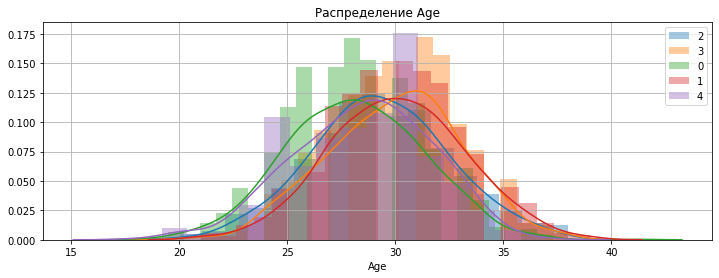

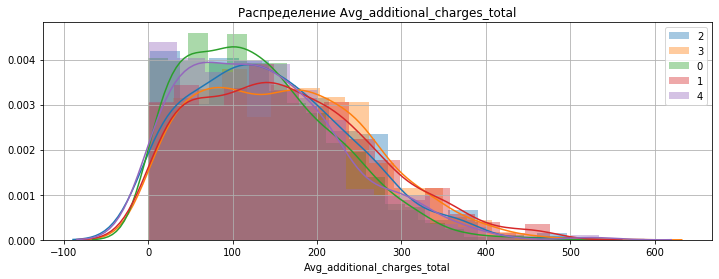

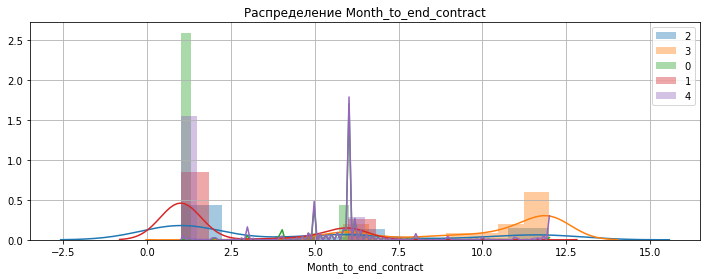

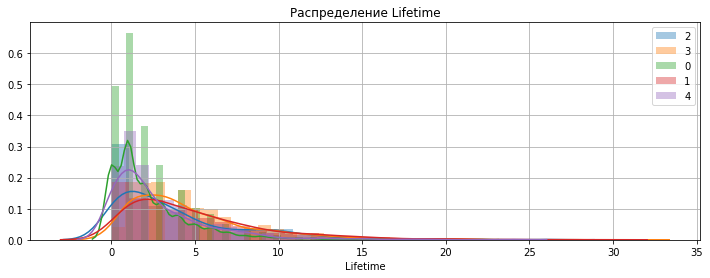

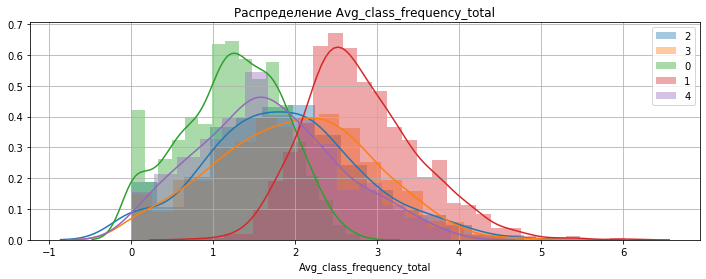

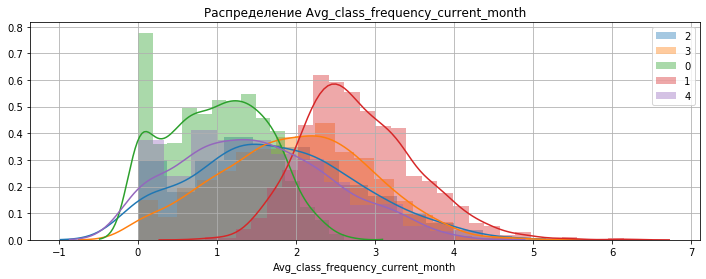

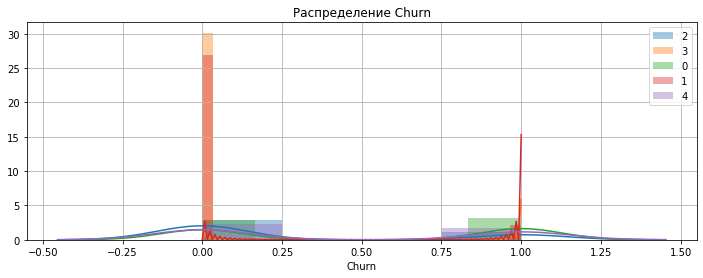

In [43]:
for col in df.loc[:, df.columns != 'cluster_km'].columns:
    plt.figure(figsize=(12,4))
    plt.grid()
    for cluster in df['cluster_km'].unique():
        plt.title('Распределение '+col)
        sns.distplot(df.query('cluster_km == @cluster')[col], label=cluster)
    plt.legend()
    plt.show()    

Характер распределений подтверждает перечисленные выше выводы.

<font color='green'>Графики наглядные, молодец. </font> <font color='blue'>На данных графиках непрерывной кривой показана плотность распределения (площадь под этой кривой равна 1). Для бинарных или дискретных величин (Phone, Contract_period и т.п.) лучше изображать гистограмму с распределением вероятностей: *.hist(...) с параметрами density=True и шириной столбиков, равной 1. В этом случае гистограмма нормируется так, чтобы суммарная высота столбиков была равна 1. Нормировка нужна, чтобы сравнивать распределения в разных группах между собой (так как в разных группах разное число объектов).</font>

### Шаг 5.  Выводы и рекомендации

По результатам анализа выявлены группы клиентов наиболее склонных к оттоку. Для них характерны следующие показатели (признаки):
+ абонементы на короткий срок. Клиенты купившие абонемент на 1 месяц скорее всего не вернутся
+ чаще всего уходят за 1 месяц до окончания абонемента и за промежуток от 5 до 6 месяцев
+ низкая частота посещения — симптом высокой вероятности оттока клиента
 
Считаю возможным рекомендовать следующее:
1. Принять дополнительные меры по стимулированию посещения фитнес — центра в целом
2. При приближении критических сроков (1 и 5 месяц до окончания абонемента) до их наступления привлекать клиента различного рода акциями и скидками, понуждающих к продлению абонемента желательно на максимальный срок 12 месяцев.
3. По возможности, расширять дополнительные услуги фитнес-центра, а условия по скидкам и акциям на них связывать  с длительностью абонемента и активностью посещения.

# Итоговый комментарий

Спасибо, ты провел отличное исследование. Успехов в дальнейших проектах! :)